In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Review: Linear Regression

In [6]:
#load in mtcars.csv
cars = pd.read_csv('data/mtcars.csv')

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
#build regression to predict hp using mpg
cars.head()
X = cars[['mpg']]
y = cars['hp']
#instantiate and fit
lr = LinearRegression().fit(X, y)
#predict
yhat = lr.predict(X)

In [10]:
lr.coef_

array([-8.82973099])

In [11]:
lr.intercept_

324.08231421252054

In [12]:
cars.head(1)

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.62,16.46,0,1,4,4


Text(0, 0.5, 'hp')

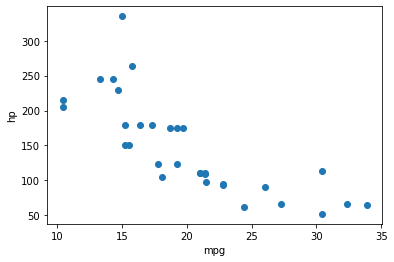

In [17]:
#plot results
plt.scatter(X, y)
plt.xlabel('mpg')
plt.ylabel('hp')
# plt.plot(X, yhat, color = 'red')

In [18]:
#mean squared error
from sklearn.metrics import mean_squared_error

In [19]:
mean_squared_error(y, yhat)

1810.4863703431888

### Bias-Variance: The Sweet Spot

### Bias and Variance in Sampling

- Take simple random samples of size 10
- Take simple random samples of size 100

In [20]:
population = np.random.normal(30, 8, 10_000)

In [21]:
#samples of size 10 -- repeat 1000 times
population = np.random.normal(30, 8, 10_000)
s1 = [np.mean(np.random.choice(population, size = 10)) for _ in range(1000)]
s2 = [np.mean(np.random.choice(population, size = 100)) for _ in range(1000)]

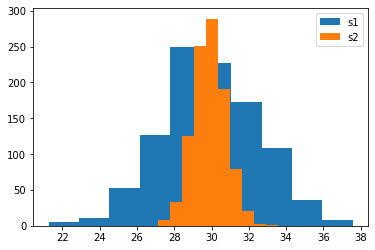

In [24]:
#histograms of each
plt.hist(s1, label = 's1')
plt.hist(s2, label = 's2')
plt.legend();

### Regression Setting

In [ ]:
cars = pd.read_csv('data/mtcars.csv')

In [ ]:
#mpg vs. hp


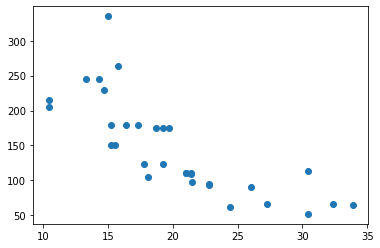

In [25]:
#scatterplot
plt.scatter(X, y)

### Reminder on Least Squares

$$f(m, b) = \sum_{i = 1}^n (y_i - (mx_i + b))^2$$

In [ ]:
#fit model
from sklearn.linear_model import LinearRegression


In [ ]:
#plot residuals


In [ ]:
#Any assumptions violated?  Why?


### Reminder: Quadratics

$$f(x) = ax^2 + bx + c$$


$$f(a, b, c) = \sum_{i = 1}^n (y_i - (ax_i^2 + bx_i + c))^2$$

In [27]:
#examine X
X.head(2)

,mpg
0,21.0
1,21.0


In [31]:
#add new feature
X.loc[:, 'mpg^2'] = X['mpg']**2
X.head(2)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value


,mpg,mpg^2
0,21.0,441.0
1,21.0,441.0


In [32]:
X.head(3)

,mpg,mpg^2
0,21.0,441.00
1,21.0,441.00
2,22.8,519.84


In [33]:
#build model on quadratic data
qr = LinearRegression().fit(X, y)

In [34]:
#look at coefficients
qr.coef_

array([-23.34451763,   0.33002884])

In [35]:
qr.intercept_

470.86947158376057

In [36]:
#residuals
resids = y - qr.predict(X)

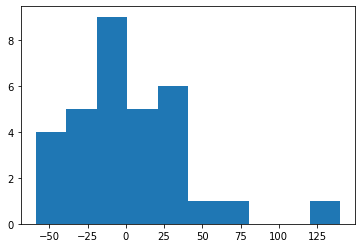

In [38]:
#plot these
plt.hist(resids);

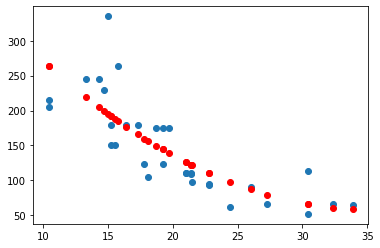

In [42]:
#plot predictions
plt.scatter(X.iloc[:, 0], y)
plt.plot(X.iloc[:, 0], qr.predict(X), 'ro')

In [45]:
mean_squared_error(y, qr.predict(X), squared = False) #quadratic predictions and mse

40.28784288153709

In [46]:
mean_squared_error(y, yhat, squared=False) #linear predictions mse

42.54981046189499

In [47]:
qr.coef_

array([-23.34451763,   0.33002884])

In [49]:
#how would you build a cubic model???
X['mpg^3'] = X['mpg']**3

<ipython-input-49-e0f23a94a611>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['mpg^3'] = X['mpg']**3


In [50]:
cr = LinearRegression().fit(X, y)

In [52]:
mean_squared_error(y, cr.predict(X), squared=False)

37.7303673038864

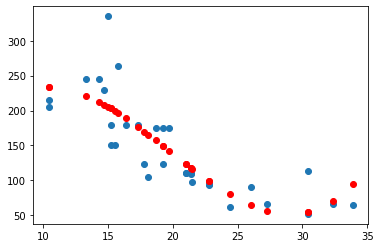

In [53]:
plt.scatter(X.iloc[:, 0], y)
plt.scatter(X.iloc[:, 0], cr.predict(X), color = 'red')